# Pymaceuticals Inc.
---

### Analysis

- As mouse weight increases so does tumor volume.
- The final tumor volumes for Infubinol and Ceftamin were higher than Capomulin and Ramicane.
- Capomulin shows a very steady decrease of tumor volume after 20 days of having the treatment administered.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mouse_data_complete['Mouse ID'].nunique()
mouse_count

249

In [9]:
mouse_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [ ]:
print(mouse_data_complete['Timepoint'])

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_duplicates = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
mouse_data_duplicates

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_m_data = mouse_data_complete[mouse_data_complete['Mouse ID'] != 'g989']
clean_m_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
clean_m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
mouse_count_clean = clean_m_data['Mouse ID'].nunique()
mouse_count_clean

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meantv = clean_m_data['Tumor Volume (mm3)'].groupby(clean_m_data['Drug Regimen']).mean()
mediantv = clean_m_data['Tumor Volume (mm3)'].groupby(clean_m_data['Drug Regimen']).median()
vartv = clean_m_data['Tumor Volume (mm3)'].groupby(clean_m_data['Drug Regimen']).var()
stantv = clean_m_data['Tumor Volume (mm3)'].groupby(clean_m_data['Drug Regimen']).std()
semtv = clean_m_data['Tumor Volume (mm3)'].groupby(clean_m_data['Drug Regimen']).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sumstats_tumors = pd.DataFrame({"Mean Tumor Volume": meantv,
                               "Median Tumor Volume": mediantv,
                               "Variance of Tumor Volumes": vartv,
                               "Standard Deviation of Tumor Volumes": stantv,
                               "SEM of Tumor Volumes": semtv})
sumstats_tumors

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,Standard Deviation of Tumor Volumes,SEM of Tumor Volumes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg = clean_m_data.groupby(["Drug Regimen"])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

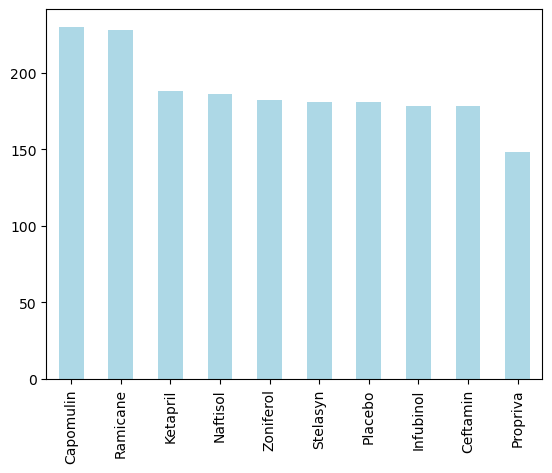

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dregcount = clean_m_data['Drug Regimen'].value_counts()
barchart = dregcount.plot.bar(color='lightblue')

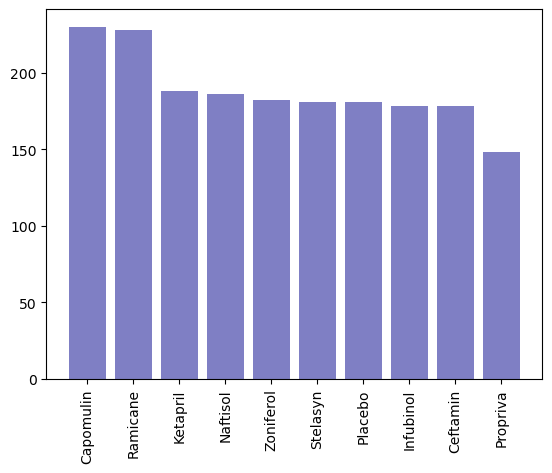

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = dregcount.index.values
yaxis = dregcount.values
plt.bar(xaxis, yaxis, color='darkblue', alpha=0.5, align='center')
plt.xticks(rotation = "vertical")
plt.show()

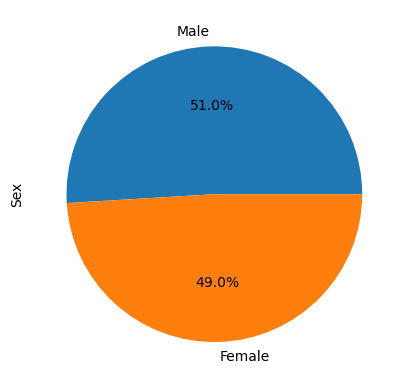

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexmiceps = clean_m_data['Sex'].value_counts()
sexmiceps.plot.pie(autopct="%1.1f%%")
plt.show()

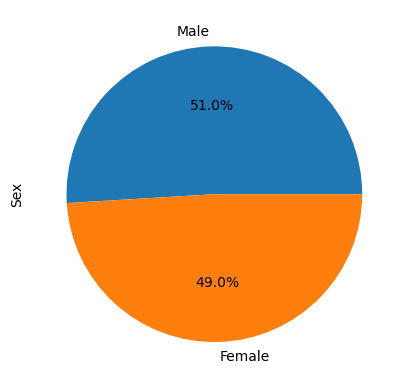

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=[49.5, 50.5]
labels = ['Female','Male']
plot = sexmiceps.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime = clean_m_data.groupby(['Mouse ID'])["Timepoint"].max()
lasttime = lasttime.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merglasttime = lasttime.merge(clean_m_data, on=["Mouse ID", "Timepoint"], how="left")

In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
outliers = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    indtumorvol = merglasttime.loc[merglasttime["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol.append(indtumorvol)
    
    # Determine outliers using upper and lower bounds
    quar = indtumorvol.quantile([.25, .5, .75])
    low = quar[.25]
    high = quar[.75]
    inq = high - low
    lower = low - (1.5*inq)
    higher = high + (1.5*inq)
    outlier = indtumorvol.loc[(indtumorvol < lower) | (indtumorvol > higher)]
    print(f"{treatment}'s potential outliers: {outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


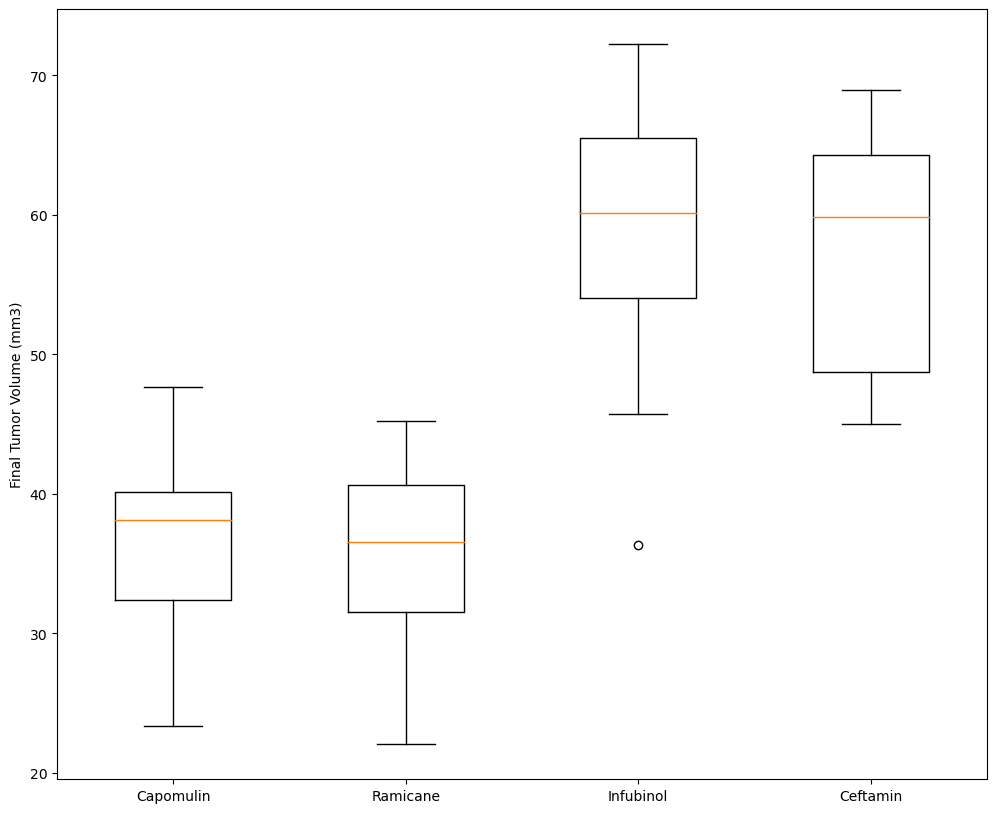

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, x1 = plt.subplots(figsize=(12,10))
x1.set_ylabel('Final Tumor Volume (mm3)', fontsize = 10)
x1.boxplot(tumorvol, widths=0.5, vert=True, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

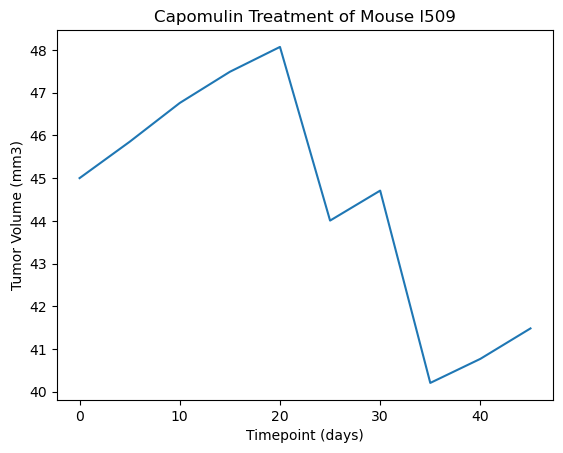

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulininfo = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"]== "Capomulin",:]
capomulinmice = capomulininfo.loc[capomulininfo["Mouse ID"] == "l509",:]

axiscapo = capomulinmice["Timepoint"]
capotum = capomulinmice["Tumor Volume (mm3)"]

plt.title('Capomulin Treatment of Mouse l509')
plt.plot(axiscapo, capotum, linewidth=1.5, markersize=10)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\bosto\AppData\Local\Temp\ipykernel_19432\1486938512.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomean = capomulininfo.groupby(['Mouse ID']).mean()


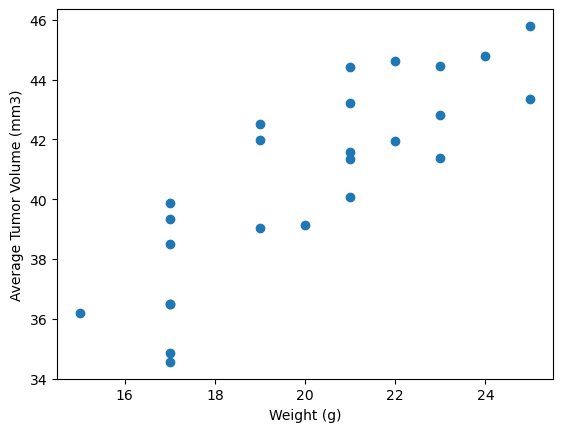

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomean = capomulininfo.groupby(['Mouse ID']).mean()
plt.scatter(capomean['Weight (g)'], capomean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [103]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
linearmd = st.linregress(capomean['Weight (g)'], capomean['Tumor Volume (mm3)'])
linearmd

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

The correlation between mouse weight and average tumor volume is 0.84


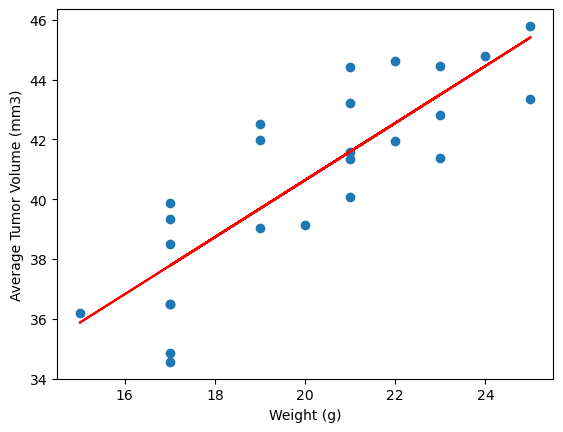

In [104]:
slope = 0.9544396890241049
binter = 21.552160532685008

yv = capomean['Weight (g)']*slope+binter
plt.scatter(capomean['Weight (g)'], capomean['Tumor Volume (mm3)'])
plt.plot(capomean['Weight (g)'],yv, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation = round(st.pearsonr(capomean['Weight (g)'], capomean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
plt.show()